[View in Colaboratory](https://colab.research.google.com/github/averma12/Deep-Learning/blob/master/Kaggle1.ipynb)

In [0]:
import numpy as np

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

In [0]:
## authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train = '1nKh8jiFUkDM9p7zcMSqv4O-v49EBZ42u'
test  = '1lAyizqcTEyCOnIB_je6EU_XuyqrncGTs'
train_downloaded = drive.CreateFile({'id':train})
test_downloaded =  drive.CreateFile({'id':test})
train_downloaded.GetContentFile('train.csv')
test_downloaded.GetContentFile('test.csv')

In [0]:
df_train = pd.read_csv('train.csv')

In [7]:
df_train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
df_test = pd.read_csv('test.csv')
df_test.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N


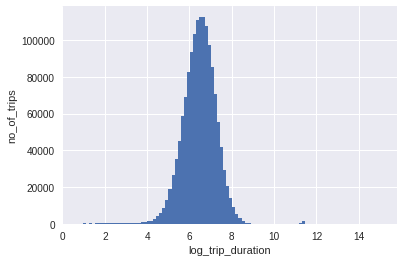

In [9]:
df_train['log_trip_duration'] = np.log(df_train['trip_duration'].values + 1)
plt.hist(df_train['log_trip_duration'].values,bins=100)
plt.xlabel('log_trip_duration')
plt.ylabel('no_of_trips')
plt.show()

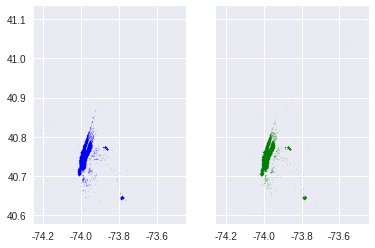

In [11]:
N = 10000
city_long_border = (-75,-75)
city_lat_border = (40,40)
fig,ax = plt.subplots(ncols=2,sharex=True,sharey=True)
ax[0].scatter(df_train['pickup_longitude'].values[:N],
             df_train['pickup_latitude'].values[:N],color='blue',s=1,label="train",alpha=0.1)
ax[1].scatter(df_test['pickup_longitude'].values[:N],
             df_test['pickup_latitude'].values[:N],color='green',s=1,label="test",alpha=0.1)

plt.show()

In [0]:
feature_names = list(df_train.columns)
y = np.log(df_train['trip_duration'].values + 1)
X_train, X_test, y_train, y_test = train_test_split(df_train[feature_names].values, y, test_size=0.2)